In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
df=pd.read_csv("Marmara1990K_Tr100Day.csv")

In [ ]:
Marmara1990K_Tr100Day= df
Marmara1990K_Tr100Day.head()


,Time,Max_Magnitude,Mean_Magnitude,Std_Magnitude,Mean_Depth,Earthquake_Frequency,Earthquake_Numbers,Mean_Energy,Std_Energy,Mean_b_value,Std_b_value,b_value_ratio,Total_Energy,Energy_Density,Elapsed_Time,Future_Max_Magnitude
0,1990-04-11 20:34:55,3.8,2.781944,0.275439,12.208333,0.72,72,191.560556,396.666450,6.589861,3.986469,0.604940,13792.36,191.560556,12.546389,3.9
1,1990-04-14 05:05:04,3.8,2.783333,0.274247,12.347222,0.72,72,191.888889,396.545203,6.702222,3.962932,0.591286,13816.00,191.888889,56.502500,3.9
2,1990-04-17 20:52:41,3.8,2.787671,0.274846,12.260274,0.73,73,193.121096,393.922499,6.745479,3.952632,0.585968,14097.84,193.121096,87.793611,3.9
3,1990-04-18 10:18:02,3.8,2.786486,0.273147,12.216216,0.74,74,191.589595,391.436863,6.787432,3.942021,0.580782,14177.63,191.589595,13.422500,3.9
4,1990-04-19 08:40:23,3.8,2.781333,0.274941,12.306667,0.75,75,189.370000,389.257927,6.828267,3.931233,0.575729,14202.75,189.370000,22.372500,3.9


In [ ]:
Marmara1990K_Tr100Day.shape

(18685, 16)

In [ ]:
Marmara1990K_Tr100Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18685 entries, 0 to 18684
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  18685 non-null  object 
 1   Max_Magnitude         18685 non-null  float64
 2   Mean_Magnitude        18685 non-null  float64
 3   Std_Magnitude         18685 non-null  float64
 4   Mean_Depth            18685 non-null  float64
 5   Earthquake_Frequency  18685 non-null  float64
 6   Earthquake_Numbers    18685 non-null  int64  
 7   Mean_Energy           18685 non-null  float64
 8   Std_Energy            18685 non-null  float64
 9   Mean_b_value          18685 non-null  float64
 10  Std_b_value           18685 non-null  float64
 11  b_value_ratio         18685 non-null  float64
 12  Total_Energy          18685 non-null  float64
 13  Energy_Density        18685 non-null  float64
 14  Elapsed_Time          18685 non-null  float64
 15  Future_Max_Magnitud

In [ ]:
X = Marmara1990K_Tr100Day.iloc[:, 1:14].values

y = Marmara1990K_Tr100Day.iloc[:,15].values

In [ ]:
X

array([[3.80000000e+00, 2.78194444e+00, 2.75438901e-01, ...,
        6.04939735e-01, 1.37923600e+04, 1.91560556e+02],
       [3.80000000e+00, 2.78333333e+00, 2.74246728e-01, ...,
        5.91286250e-01, 1.38160000e+04, 1.91888889e+02],
       [3.80000000e+00, 2.78767123e+00, 2.74846020e-01, ...,
        5.85967599e-01, 1.40978400e+04, 1.93121096e+02],
       ...,
       [4.00000000e+00, 2.41456311e+00, 4.49271255e-01, ...,
        2.10752826e-01, 2.06790100e+04, 2.00767087e+02],
       [4.00000000e+00, 2.41456311e+00, 4.49271255e-01, ...,
        2.10546241e-01, 2.06790100e+04, 2.00767087e+02],
       [4.00000000e+00, 2.41274510e+00, 4.47140877e-01, ...,
        2.10942522e-01, 2.05491400e+04, 2.01462157e+02]])

In [ ]:
y

array([3.9, 3.9, 3.9, ..., 4.3, 4.3, 4.3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Create an instance of StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.20081078, -0.07919316, -0.16980356, ..., -1.12933019,
        -0.28368406, -0.26224387],
       [-0.48508759,  0.30661947, -0.67789598, ..., -0.21253093,
        -0.28373323, -0.26230089],
       [-0.95888227,  0.66955981, -1.53681301, ..., -0.04776695,
        -0.28384658, -0.26242407],
       ...,
       [ 1.50485009, -1.02112144,  1.72098221, ..., -0.99525463,
        -0.2373535 , -0.15670899],
       [-0.86412333, -0.0969312 , -0.8539638 , ...,  0.64250642,
        -0.2838529 , -0.26250643],
       [-0.39032865,  0.67199105, -0.82483044, ..., -0.30421243,
        -0.28372047, -0.26219018]])

In [ ]:
X_test

array([[-0.48508759, -0.04938928, -0.7638089 , ...,  1.39743435,
        -0.28375447, -0.26240815],
       [ 2.16816265, -0.10743901,  1.97493634, ...,  0.66344513,
         0.75110164,  1.14298933],
       [-0.29556971, -0.8554404 ,  1.43249008, ..., -0.5745475 ,
        -0.28359667, -0.2617405 ],
       ...,
       [-0.10605184,  0.33699246, -0.70516203, ..., -0.68729281,
        -0.28353711, -0.26202075],
       [ 0.27298391,  0.7350752 , -0.11128434, ...,  0.76562987,
        -0.28275777, -0.25869607],
       [-0.67460546, -1.52977507,  0.32669332, ..., -0.77905542,
        -0.28390214, -0.26250548]])

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(256, activation='relu')(input_layer)
dense_layer_2 = Dense(128, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(64, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(32, activation='relu')(dense_layer_3)
output = Dense(1)(dense_layer_4)
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
my_model = model

In [ ]:
my_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, batch_size= 16, epochs= 300, verbose=1, validation_split=0.2)

Epoch 1/300
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8577 - mean_squared_error: 1.8577 - val_loss: 0.3133 - val_mean_squared_error: 0.3133
Epoch 2/300
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2926 - mean_squared_error: 0.2926 - val_loss: 0.2584 - val_mean_squared_error: 0.2584
Epoch 3/300
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2355 - mean_squared_error: 0.2355 - val_loss: 0.2429 - val_mean_squared_error: 0.2429
Epoch 4/300
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1838 - mean_squared_error: 0.1838 - val_loss: 0.1652 - val_mean_squared_error: 0.1652
Epoch 5/300
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1523 - mean_squared_error: 0.1523 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 6/300
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1344 - mean_squared_error: 0.1344 - val_loss: 0.1709 - val_mean_squared_error: 0.1709
Epoch 7/300
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1343 - mean_squared_error: 0.1343 - val_los

<Figure size 10000x2500 with 0 Axes>

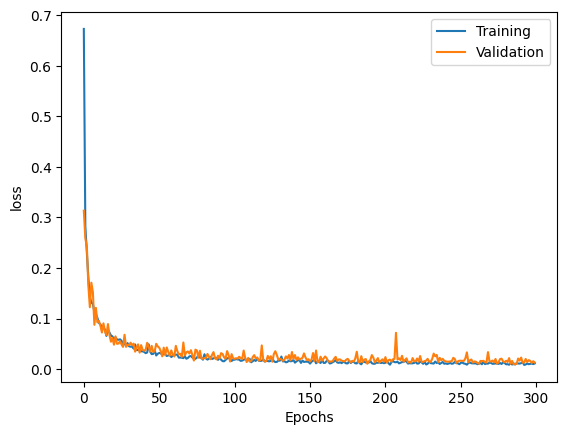

<Figure size 10000x2500 with 0 Axes>

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Training","Validation"])
plt.figure(figsize = (20,5), dpi = (500))

In [ ]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.around(predictions)[:10])
print('Actual labels : ' ,y_test[:10])

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted labels:  [[4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [7.]
 [4.]
 [4.]
 [5.]]
Actual labels :  [3.6 4.9 4.4 4.1 3.8 4.3 7.2 4.3 4.3 4.6]


In [ ]:
from sklearn.metrics import r2_score
y_true = np.around(predictions)
y_pred = y_test
r2_score(y_true, y_pred)

0.8650128016866074

<Figure size 12500x2500 with 0 Axes>

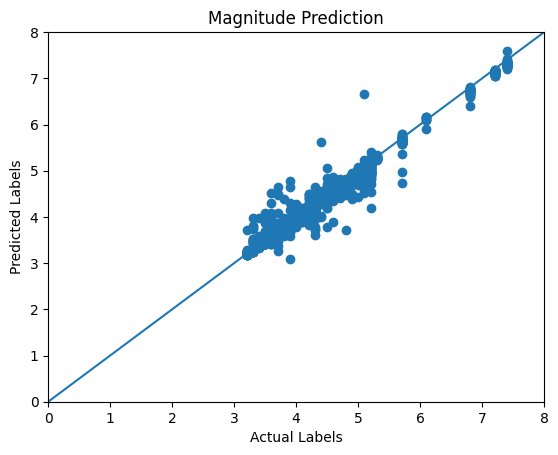

<Figure size 12500x2500 with 0 Axes>

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Magnitude Prediction')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.figure(figsize = (25,5), dpi = (500))

In [ ]:
my_model = model

In [ ]:
model.save('my_model.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Modeli Google Drive'a kaydedin
save_path = '/content/drive/My Drive/saved_models/my_model.keras'
model.save(save_path)


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Google Drive'dan modeli yükleyin
load_path = '/content/drive/My Drive/saved_models/my_model.keras'
loaded_model = load_model(load_path)

# Modelin özetini görüntüleyin
loaded_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)

In [ ]:
import tensorflow as tf
import pandas as pd
raw_dataset=pd.read_csv("Marmara2024_Pr100Day.csv",sep=",")

In [ ]:
Marmara2024_Pr100Day = raw_dataset.copy()
Marmara2024_Pr100Day.head()

,Time,Max_Magnitude,Mean_Magnitude,Std_Magnitude,Mean_Depth,Earthquake_Frequency,Earthquake_Numbers,Mean_Energy,Std_Energy,Mean_b_value,Std_b_value,b_value_ratio,Total_Energy,Energy_Density,Elapsed_Time
0,2024-04-12 10:20:45,4.9,2.459242,0.506009,11.457820,2.11,211,1032.555735,10028.947801,1.479384,0.176730,0.119462,217869.26,1032.555735,20.405000
1,2024-04-13 03:31:15,4.9,2.459716,0.505906,11.423223,2.11,211,1032.590521,10028.944277,1.482227,0.179285,0.120956,217876.60,1032.590521,17.175000
2,2024-04-13 12:45:20,4.9,2.458962,0.504825,11.416038,2.12,212,1027.803679,10005.393541,1.484528,0.181970,0.122578,217894.38,1027.803679,9.234722
3,2024-04-16 12:21:52,4.9,2.460190,0.505708,11.426066,2.11,211,1032.615118,10028.941770,1.487725,0.185042,0.124379,217881.79,1032.615118,71.608889
4,2024-04-17 04:09:43,4.9,2.458019,0.505498,11.414623,2.12,212,1027.774057,10005.396570,1.489481,0.186365,0.125121,217888.10,1027.774057,15.797500


In [ ]:
Marmara2024_Pr100Day.shape

(223, 15)

In [ ]:
X_new =Marmara2024_Pr100Day.iloc[:, 1:14].values

In [ ]:
X_new

array([[     4.9       ,      2.45924171,      0.50600903, ...,
             0.11946177, 217869.26      ,   1032.5557346 ],
       [     4.9       ,      2.45971564,      0.50590599, ...,
             0.12095646, 217876.6       ,   1032.59052133],
       [     4.9       ,      2.45896226,      0.50482493, ...,
             0.12257759, 217894.38      ,   1027.80367925],
       ...,
       [     4.4       ,      2.38615385,      0.46195134, ...,
             0.03401108,  32099.91      ,    493.84476923],
       [     4.4       ,      2.3968254 ,      0.46592546, ...,
             0.03389607,  32088.35      ,    509.33888889],
       [     4.4       ,      2.39375   ,      0.46286719, ...,
             0.03443142,  32100.94      ,    501.5771875 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scaler to your data
sc.fit(X_new)

# Transform your data
X_new = sc.transform(X_new)


In [ ]:
X_new

array([[ 1.30541982,  1.01482143,  0.96628545, ...,  0.25021141,
         1.61718568,  1.14990798],
       [ 1.30541982,  1.02845421,  0.96418899, ...,  0.29362254,
         1.61727477,  1.14999595],
       [ 1.30541982,  1.00678323,  0.94219307, ...,  0.34070574,
         1.61749058,  1.1378913 ],
       ...,
       [ 0.00582777, -1.08756321,  0.06986327, ..., -2.23157366,
        -0.6376602 , -0.2123484 ],
       [ 0.00582777, -0.78059425,  0.15072295, ..., -2.23491388,
        -0.63780052, -0.1731679 ],
       [ 0.00582777, -0.86905856,  0.08849763, ..., -2.21936555,
        -0.6376477 , -0.19279517]])

In [ ]:
print(model.predict(X_new))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[4.4590526]
 [4.4664783]
 [4.454427 ]
 [4.474298 ]
 [4.452442 ]
 [4.4428015]
 [4.4287333]
 [4.409693 ]
 [4.4005413]
 [4.457918 ]
 [4.479157 ]
 [4.4657707]
 [4.4250393]
 [4.455633 ]
 [4.539295 ]
 [4.5146136]
 [4.534255 ]
 [4.5461144]
 [4.5593014]
 [4.552394 ]
 [4.568336 ]
 [4.550352 ]
 [4.5365605]
 [4.524192 ]
 [4.529688 ]
 [4.5115404]
 [4.527196 ]
 [4.535763 ]
 [4.4571176]
 [4.462824 ]
 [4.394741 ]
 [4.393442 ]
 [4.3538895]
 [4.3376236]
 [4.3009233]
 [4.3400297]
 [4.307996 ]
 [4.291088 ]
 [4.2606287]
 [4.2742586]
 [4.6251497]
 [4.6038237]
 [4.578353 ]
 [4.644974 ]
 [4.6359377]
 [4.680636 ]
 [4.6710353]
 [4.666463 ]
 [4.7166185]
 [4.6918216]
 [4.681484 ]
 [4.61008  ]
 [4.596981 ]
 [4.702767 ]
 [4.836051 ]
 [4.874816 ]
 [4.798237 ]
 [4.717077 ]
 [4.7120247]
 [4.7912693]
 [4.000914 ]
 [4.1673884]
 [4.258686 ]
 [4.3805737]
 [4.537542 ]
 [4.843189 ]
 [4.9266825]
 [4.947696 ]
 [5.0118113]
 [4.1102057]
 [3.9492507]
 [4.031295 ]
 [3.9135075]
 [4.0264406]
